# Project 4 - Identifiez les causes d'attrition au sein d'une ESN¶

### Préparation des données pour la modelisation

**Objectif** : préparer les données pour la modélisation.

**Contenu :**

- Nettoyage final

- Encodage des variables catégorielles

- Normalisation ou standardisation

- Sauvegarde des données prêtes dans /data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prétraitement et modélisation
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder


In [35]:
df_central = pd.read_csv("../data/df_central.csv")

In [36]:
df_central.head()

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,...,0,0,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,...,1,3,1,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,...,0,3,1,2,2,Autre,Y,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,...,0,3,1,3,4,Infra & Cloud,Y,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,...,1,3,1,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [37]:
df_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   id_employee                                1470 non-null   int64 
 1   age                                        1470 non-null   int64 
 2   genre                                      1470 non-null   object
 3   revenu_mensuel                             1470 non-null   int64 
 4   statut_marital                             1470 non-null   object
 5   departement                                1470 non-null   object
 6   poste                                      1470 non-null   object
 7   nombre_experiences_precedentes             1470 non-null   int64 
 8   nombre_heures_travailless                  1470 non-null   int64 
 9   annee_experience_totale                    1470 non-null   int64 
 10  annees_dans_l_entreprise            

In [4]:
# On suprime les 'nombre_heures_travailless, nombre_employee_sous_responsabilite, ayant_enfants' car ca ne change pas d'un employe à l'autre
df_central.drop(['nombre_heures_travailless', 'nombre_employee_sous_responsabilite', 'ayant_enfants'], axis=1, inplace = True)

In [5]:
# Classification simplifiée : quanti / quali
quanti = df_central.select_dtypes(include=[np.number]).columns.tolist()
quali = df_central.select_dtypes(exclude=[np.number]).columns.tolist()
    
print(f"\nVariables quantitatives ({len(quanti)}): {quanti}")
print(f"Variables qualitatives ({len(quali)}): {quali}")


Variables quantitatives (21): ['id_employee', 'age', 'revenu_mensuel', 'nombre_experiences_precedentes', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'augementation_salaire_precedente', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']
Variables qualitatives (8): ['genre', 'statut_marital', 'departement', 'poste', 'heure_supplementaires', 'attrition', 'domaine_etude', 'frequence_deplacement']


In [6]:
# Transformation Oui/Non 'heure_supplementaires et attrition'
df_central['attrition'] = df_central['attrition'].apply(lambda x: 1 if x == 'Oui' else 0)
df_central['heure_supplementaires'] = df_central['heure_supplementaires'].apply(lambda x: 1 if x == 'Oui' else 0)

print(df_central[['heure_supplementaires','attrition']].head())

   heure_supplementaires  attrition
0                      1          1
1                      0          0
2                      1          1
3                      1          0
4                      0          0


### Corrélations de Pearson (supprimer les features trop corrélées)

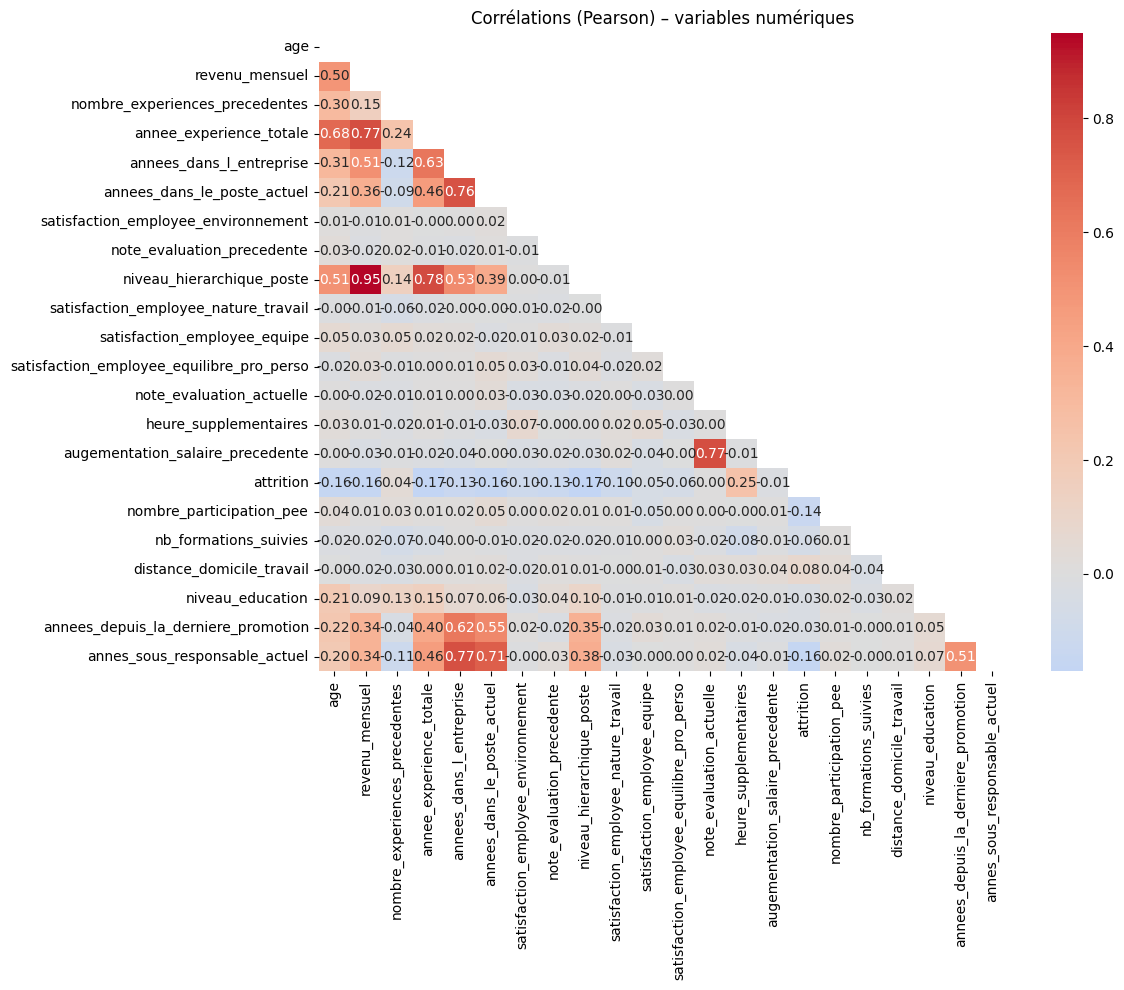

In [7]:
df_num = df_central.select_dtypes(include='number')
df_num = df_num.drop(columns=[c for c in ["id_employee"] if c in df_num.columns])

corr = df_num.corr(method="pearson")

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, cmap="coolwarm", center=0)
plt.title("Corrélations (Pearson) – variables numériques")
plt.tight_layout()
plt.show()

In [8]:
df_central[["niveau_hierarchique_poste","revenu_mensuel"]].corr(method="spearman")


,niveau_hierarchique_poste,revenu_mensuel
niveau_hierarchique_poste,1.000000,0.920429
revenu_mensuel,0.920429,1.000000


La corrélation entre `niveau_hierarchique_poste` et  `revenu_mensuel`est très forte, c’est normal (effet “grade → salaire”)

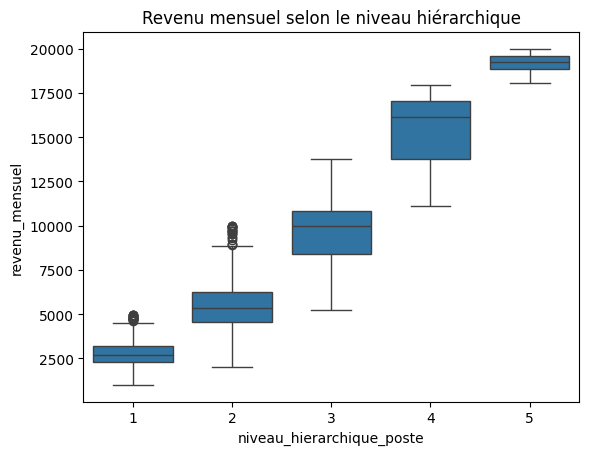

In [9]:
sns.boxplot(data=df_central, x="niveau_hierarchique_poste", y="revenu_mensuel")
plt.title("Revenu mensuel selon le niveau hiérarchique"); plt.show()


###  Pairplot pour corrélations non linéaires (+ Spearman)


In [13]:
# Création de la cible
y = df_central['attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: attrition, Length: 1470, dtype: int64

In [14]:
# Sélectionnons un petit sous-ensemble pertinent
df_pp = df_central[[
    "revenu_mensuel",
    "age",
    "distance_domicile_travail",
    "annees_dans_l_entreprise",
    "annees_dans_le_poste_actuel",
    "satisfaction_employee_nature_travail", "attrition", "note_evaluation_actuelle",
]].dropna()


In [15]:
# sous-échantillonner pour lisibilité
df_pp = df_pp.sample(n=min(800, len(df_pp)), random_state=42)

Le pairplot permet d’apercevoir des relations non linéaires (courbes, groupes, nuages) et la séparation entre “restés” et “partis”.

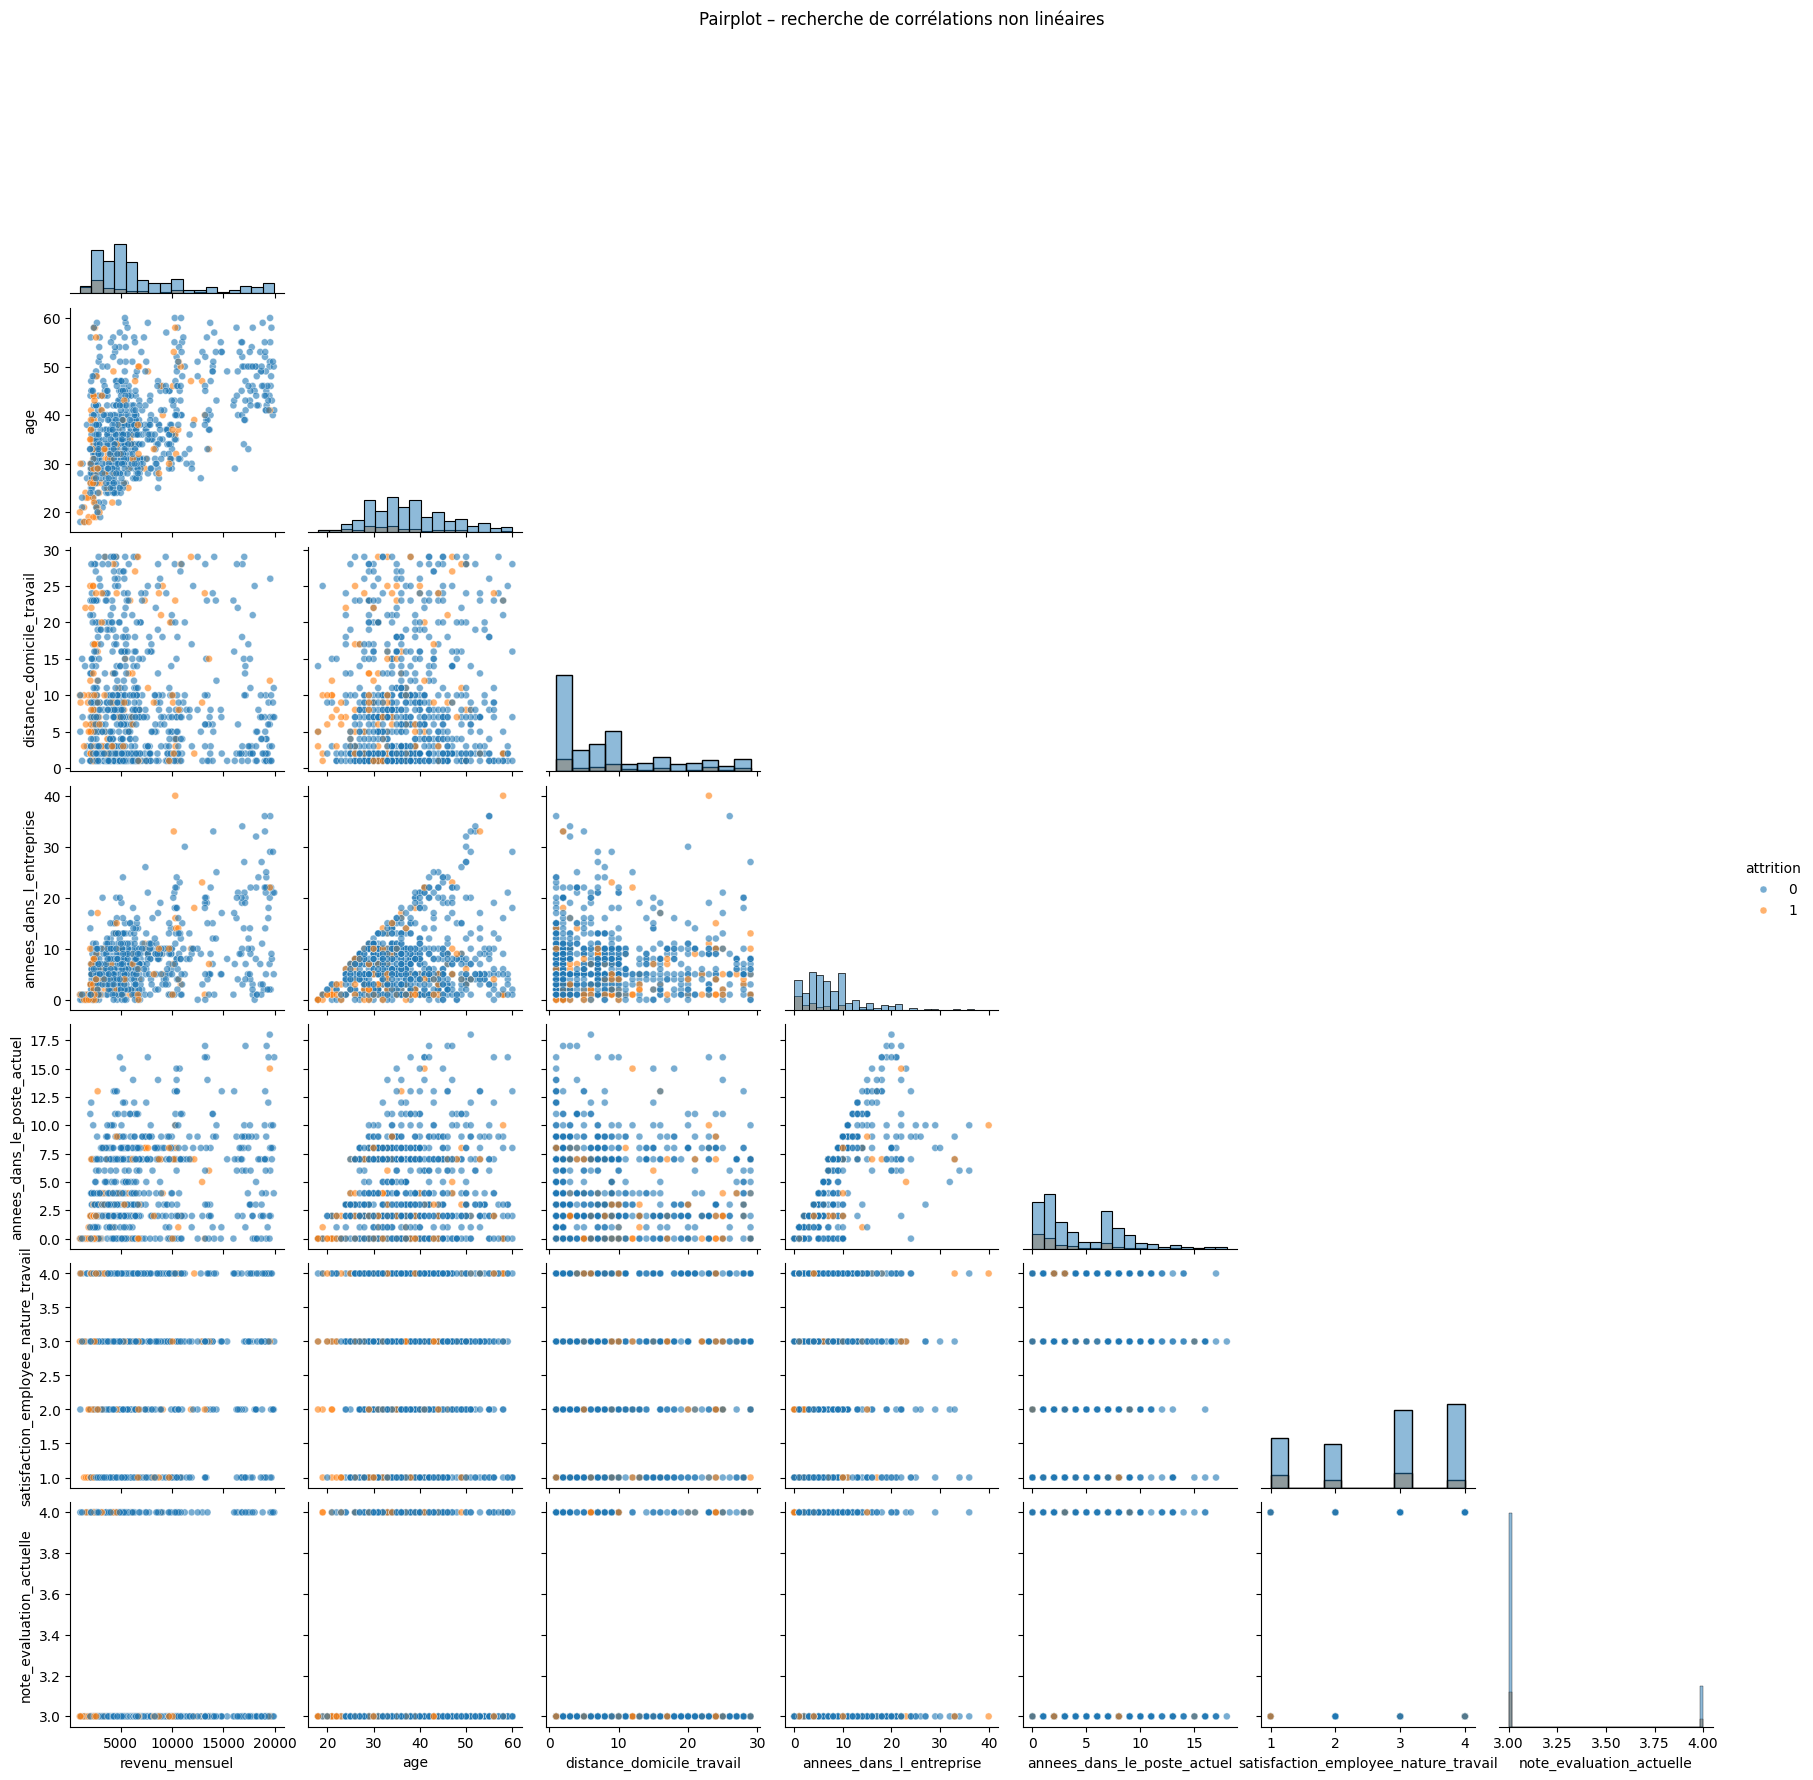

In [16]:
#Tracer le pairplot
sns.pairplot(
    df_pp,
    hue="attrition",            # couleur = 0 (restés) / 1 (partis)
    corner=True,                # triangle inférieur seulement
    diag_kind="hist",           # histogrammes en diagonale (ou "kde")
    plot_kws=dict(s=25, alpha=0.6)  # points plus lisibles
)
plt.suptitle("Pairplot – recherche de corrélations non linéaires", y=1.02)
plt.show()

In [17]:
num_cols = [c for c in df_pp.columns if c != "attrition"]   # que les features
corr_s = df_pp[num_cols].corr(method="spearman")

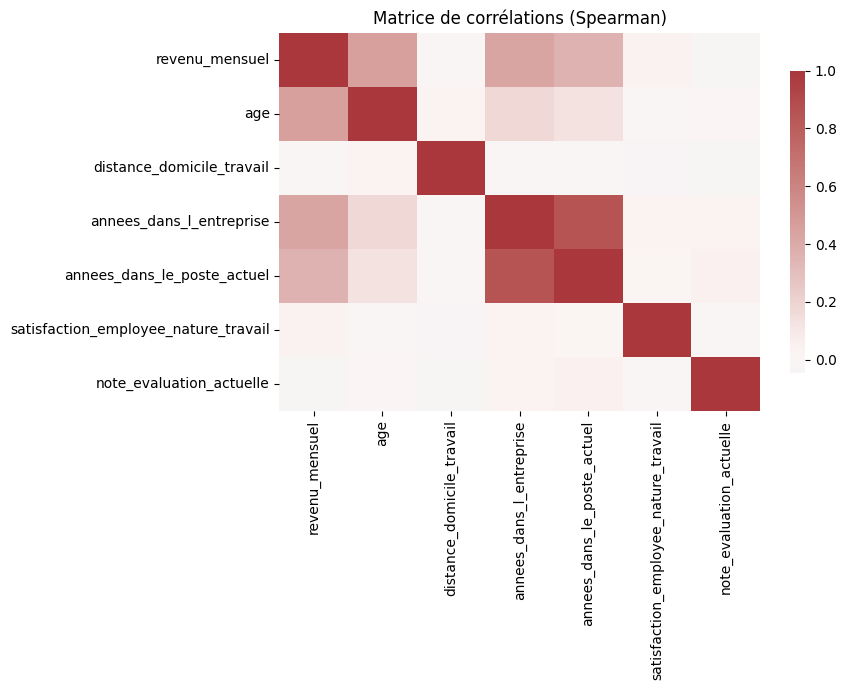

In [18]:
plt.figure(figsize=(9,7))
sns.heatmap(corr_s, cmap="vlag", center=0, annot=False, cbar_kws={"shrink": .8})
plt.title("Matrice de corrélations (Spearman)")
plt.tight_layout()
plt.show()

Pas de forte corrélation non-linéaire visible (hors bloc “carrière” `age / revenu_mensuel / ancienneté / années dans le poste)`.

In [19]:
df_central.drop(columns=['niveau_hierarchique_poste','id_employee'], inplace=True)

### Encodage des qualitatives (selon le sens métier)

In [20]:
df_central.head(3)

,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,...,augementation_salaire_precedente,attrition,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,8,6,4,...,11,1,0,0,1,2,Infra & Cloud,Occasionnel,0,5
1,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,10,10,7,...,23,0,1,3,8,1,Infra & Cloud,Frequent,1,7
2,37,M,2090,Célibataire,Consulting,Consultant,6,7,0,0,...,15,1,0,3,2,2,Autre,Occasionnel,0,0


In [21]:
df_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   age                                        1470 non-null   int64 
 1   genre                                      1470 non-null   object
 2   revenu_mensuel                             1470 non-null   int64 
 3   statut_marital                             1470 non-null   object
 4   departement                                1470 non-null   object
 5   poste                                      1470 non-null   object
 6   nombre_experiences_precedentes             1470 non-null   int64 
 7   annee_experience_totale                    1470 non-null   int64 
 8   annees_dans_l_entreprise                   1470 non-null   int64 
 9   annees_dans_le_poste_actuel                1470 non-null   int64 
 10  satisfaction_employee_environnement 

In [22]:
# Classification simplifiée : quanti / quali
quanti = df_central.select_dtypes(include=[np.number]).columns.tolist()
quali = df_central.select_dtypes(exclude=[np.number]).columns.tolist()
    
print(f"\nVariables quantitatives ({len(quanti)}): {quanti}")
print(f"Variables qualitatives ({len(quali)}): {quali}")


Variables quantitatives (21): ['age', 'revenu_mensuel', 'nombre_experiences_precedentes', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente', 'attrition', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']
Variables qualitatives (6): ['genre', 'statut_marital', 'departement', 'poste', 'domaine_etude', 'frequence_deplacement']


### Préparation de variables
- binaires (0,1)
- catégoriques
- numeriques

In [23]:
# Variables binaires (0,1)
df_central["heure_supplementaires"]

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: heure_supplementaires, Length: 1470, dtype: int64

In [24]:
# Ordinales déjà numériques (pas d’encodeur)
ord_cols  = [
    "satisfaction_employee_environnement",
    "satisfaction_employee_nature_travail",
    "satisfaction_employee_equipe",
    "satisfaction_employee_equilibre_pro_perso",
    "note_evaluation_precedente",
    "note_evaluation_actuelle",
    "niveau_education",
]
df_central[ord_cols]

,satisfaction_employee_environnement,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_precedente,note_evaluation_actuelle,niveau_education
0,2,4,1,1,3,3,2
1,3,2,4,3,2,4,1
2,4,3,2,3,2,3,2
3,4,3,3,3,3,3,4
4,1,2,4,3,3,3,1
...,...,...,...,...,...,...,...
1465,3,4,3,3,4,3,2
1466,4,1,1,3,2,3,1
1467,2,2,2,3,4,4,3
1468,4,2,4,2,2,3,3


In [25]:
# Transformation frequence_deplacement avec OrdinalEncoder
df_central["frequence_deplacement"]

0       Occasionnel
1          Frequent
2       Occasionnel
3          Frequent
4       Occasionnel
           ...     
1465       Frequent
1466    Occasionnel
1467    Occasionnel
1468       Frequent
1469    Occasionnel
Name: frequence_deplacement, Length: 1470, dtype: object

In [26]:
enc_ord = OrdinalEncoder(categories=[["Aucun","Occasionnel","Frequent"]] ,
                             handle_unknown="use_encoded_value", unknown_value=-1)

df_central["frequence_deplacement"]= enc_ord.fit_transform(df_central[["frequence_deplacement"]]).astype(np.int8) 


In [27]:
df_central["frequence_deplacement"]

0       1
1       2
2       1
3       2
4       1
       ..
1465    2
1466    1
1467    1
1468    2
1469    1
Name: frequence_deplacement, Length: 1470, dtype: int8

In [28]:
# Préparer les variables catégorielles
cat_cols = df_central.select_dtypes(include=['object']).columns.tolist()
cat_cols = [c for c in cat_cols if c != "attrition"]
df_central[cat_cols]

,genre,statut_marital,departement,poste,domaine_etude
0,F,Célibataire,Commercial,Cadre Commercial,Infra & Cloud
1,M,Marié(e),Consulting,Assistant de Direction,Infra & Cloud
2,M,Célibataire,Consulting,Consultant,Autre
3,F,Marié(e),Consulting,Assistant de Direction,Infra & Cloud
4,M,Marié(e),Consulting,Consultant,Transformation Digitale
...,...,...,...,...,...
1465,M,Marié(e),Consulting,Consultant,Transformation Digitale
1466,M,Marié(e),Consulting,Manager,Transformation Digitale
1467,M,Marié(e),Consulting,Tech Lead,Infra & Cloud
1468,M,Marié(e),Commercial,Cadre Commercial,Transformation Digitale


In [29]:
# Créer et apprendre l’encodeur (fit)
encoder = OneHotEncoder(drop=None,           
                        handle_unknown='ignore',
                        sparse_output=False )

ohe_array = encoder.fit_transform(df_central[cat_cols])
print(ohe_array)


[[1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]]


In [30]:
#Transformer en one-hot puis reconvertir en DataFrame
# Récupérer les noms de colonnes générés
ohe_cols = encoder.get_feature_names_out(cat_cols)
df_ohe = pd.DataFrame(ohe_array, columns=ohe_cols, index=df_central.index).astype("uint8")

# DataFrame propre
df_central = pd.concat([df_central.drop(columns=cat_cols), df_ohe], axis=1)


In [31]:
df_ohe

,genre_F,genre_M,statut_marital_Célibataire,statut_marital_Divorcé(e),statut_marital_Marié(e),departement_Commercial,departement_Consulting,departement_Ressources Humaines,poste_Assistant de Direction,poste_Cadre Commercial,...,poste_Représentant Commercial,poste_Ressources Humaines,poste_Senior Manager,poste_Tech Lead,domaine_etude_Autre,domaine_etude_Entrepreunariat,domaine_etude_Infra & Cloud,domaine_etude_Marketing,domaine_etude_Ressources Humaines,domaine_etude_Transformation Digitale
0,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1466,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1467,0,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1468,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [32]:
# Vérifier la forme
print(df_central.shape)


(1470, 45)


In [33]:
df_central.to_csv("../data/df_central_encode.csv", index=False)